<a href="https://colab.research.google.com/github/Tehilag37/Assembler_By_C/blob/main/Identify_Character_Traits_By_Facial_Features.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

I'm Tehila (211975867),  Final year undergraduates in 
computer science. When I got to the stage of formulating an idea for a straight project I knew that I wanted to work on images and analyze them. I tried to think about what can be discovered in different pictures, until I came up with the idea of ​​writing a project that identifies a person's features according to his picture.
A person's face is an intriguing thing and one can discover a whole world just by reading the facial features.
The problem:
When sitting in front of a person you can know things about him if he shares us and tells about himself, but sometimes there are hidden things that the person prefers to keep the information about himself, without sharing us and even if we are very curious to know what lies behind the person sitting in front of us we will not know.
the solution:
We can know many things about the person with the help of reading and recognizing his facial features, through the project that is presented to you, you can insert a picture of a person and thus know almost everything about him !!

The world is full of different characters, and just as their faces are different so are their features. We have all come across the need to know in advance who the person we are going to meet is. In a job interview, entering a new company, introductory meetings and dates.
How fun it would be if we could enter a picture of the person that interests us and get a list of characteristics ... So the goal of the project in front of you is to fulfill this little dream and make the desire a reality.
The forehead fills a significant part of the face surface and in the world of psychology and the wisdom of the face is highly regarded, and it gives great weight in diagnosing human features, we have created a project here that analyzes people's, identifies face location, age and gender. And above all the size of the forehead in relation to the face and character analysis of the person accordingly
We combined the wisdom of the face with the world of data science and analyzed images of faces by facial features and especially the forehead and thus built a model that could analyze any image and give the key features of that person. 


In [100]:
f = open("/content/drive/MyDrive/Personal_Character_Analysis_Results.txt.txt","w")
f.close()
# Open a file with access mode 'a'
File_object = open('/content/drive/MyDrive/Personal_Character_Analysis_Results.txt.txt', 'a')
# Append 'hello' at the end of file
str1="Here is your analysis of your personal character:\n"
File_object.write(str1)
# Close the file
File_object.close()

In [101]:
pip install Pillow

In [102]:
from PIL import Image
filename='/content/drive/MyDrive/Humans/1 (1004).jpg'
img=Image.open(filename)
print(img)
img.show()

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=478x810 at 0x7FD3BB157B10>


In [103]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [104]:
import numpy as np
import pandas as pd
import cv2 as cv
from google.colab.patches import cv2_imshow
from skimage import io
from PIL import Image
import matplotlib.pylab as plt

Let's present the image in different variations:
We will treat the image as an array of pixels, where each pixel is represented by three color variables, each compound of different colors together creates a different color of a pixel, and so the whole array changes which is reflected in new shades of the image on which we changed pixel colors

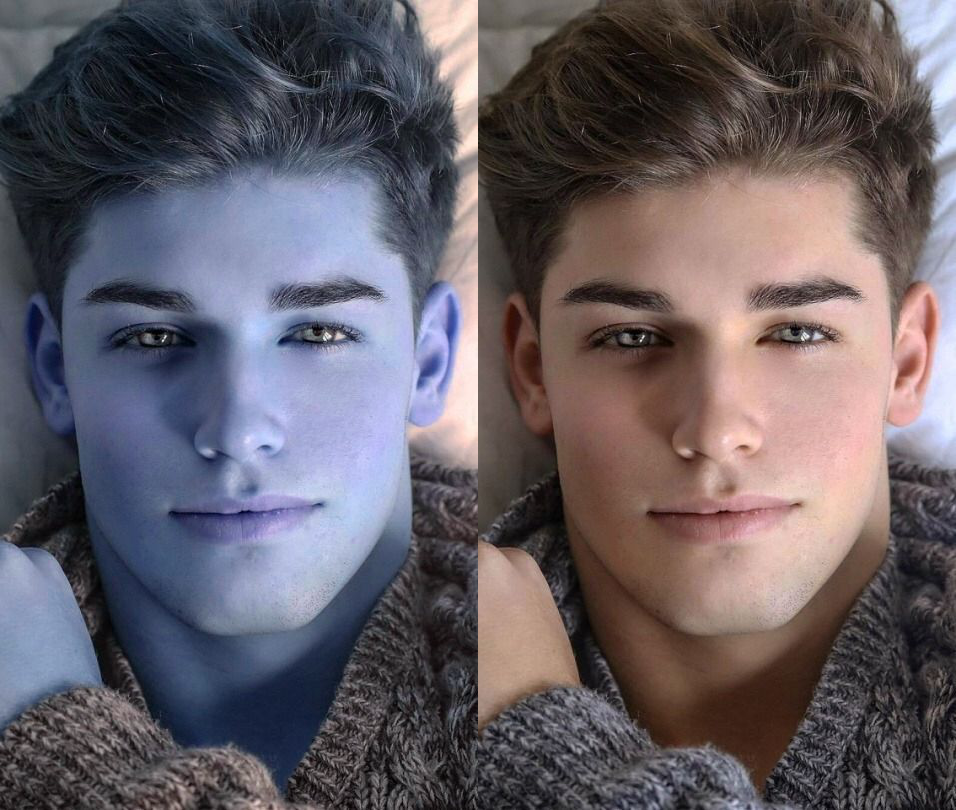

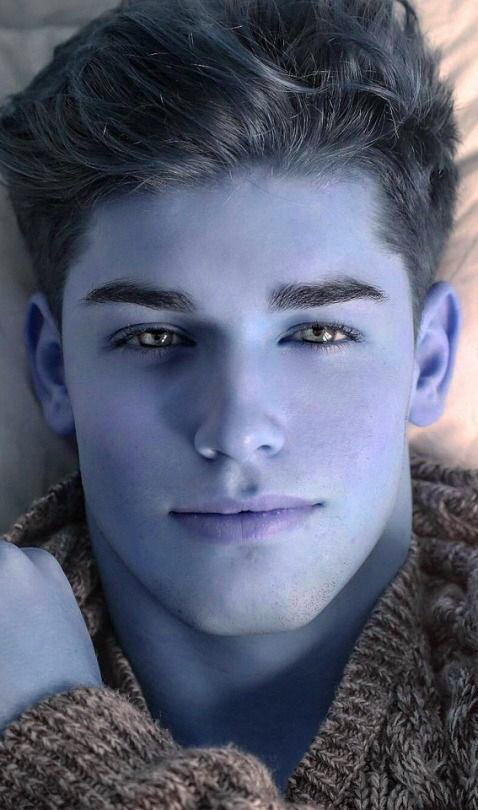

In [105]:
url="/content/drive/MyDrive/Humans/1 (1004).jpg"
image=io.imread(url)
image_2=cv.cvtColor(image, cv.COLOR_BGR2RGB)
final_frame=cv.hconcat((image, image_2))
cv2_imshow(final_frame)
cv2_imshow(image)

Let's display the histogram of RGB channel:

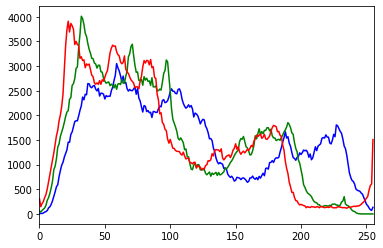

In [106]:
color=('b', 'g', 'r' )
for i, col in enumerate(color):
  histr=cv.calcHist([image],[i],None,[256],[0,256])
  plt.plot(histr, color=col)
  plt.xlim([0,256])
plt.show()

We will now represent the image in gray, by making all the pixels of the image gray
Many functions in the image processing world manage to work the gray version of the image, so this variation is very useful

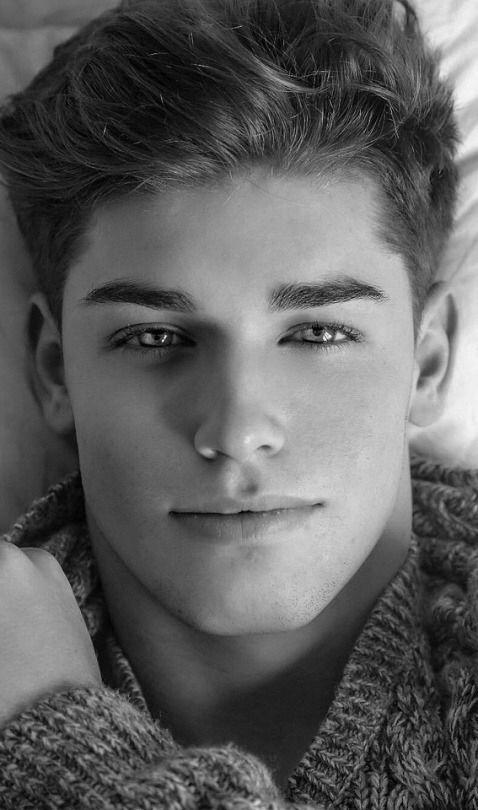

In [107]:
gray_image=cv.cvtColor(image, cv.COLOR_BGR2GRAY)
cv2_imshow(gray_image)

You can also view the outline of the image only, without all the little details that exist in it

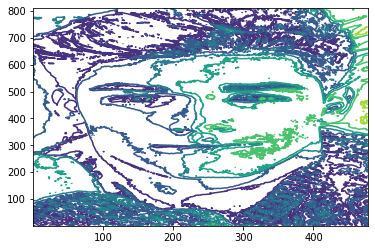

In [108]:
plt.contour(gray_image, origin="image")#Finding image of the grayscale image

Here is the picture, but there is an interesting change: we turned all the dark pixels light and all the light pixels turned dark

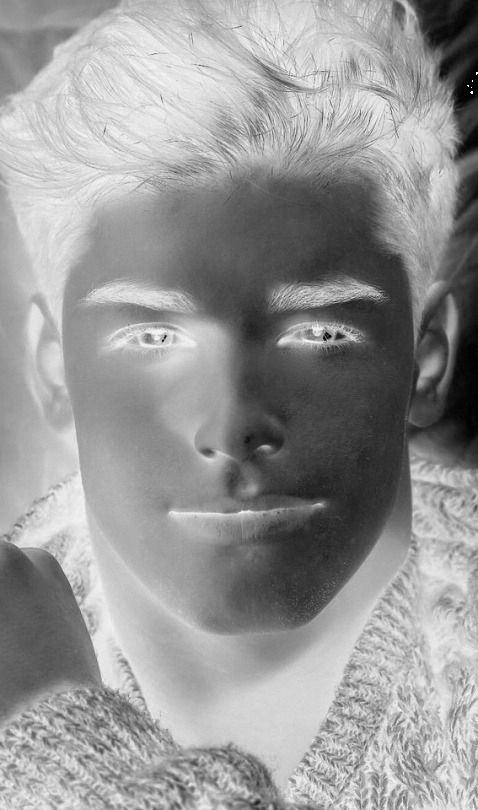

In [109]:
im2=244-gray_image#Inverse operation of the Grayscale image
cv2_imshow(im2)

You can play more with the pixels, in the image you will see in front of you, the image is displayed when the color ratio of the pixels remained the same, only we clarified all the pixels more.

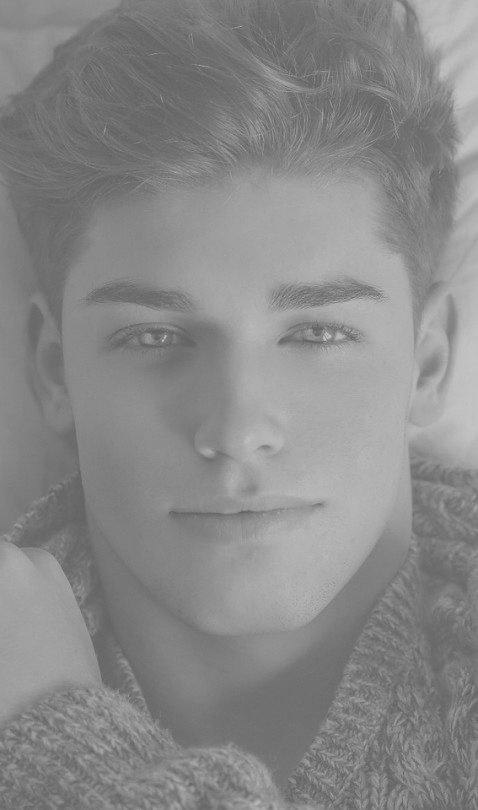

In [110]:
im3=(100.0/255)*gray_image+100#Highlights all image pixels
cv2_imshow(im3)

You can play more with the pixels, in the image you will see where the image is displayed when the color ratio of the pixels remained the same, only we darkened all the pixels more

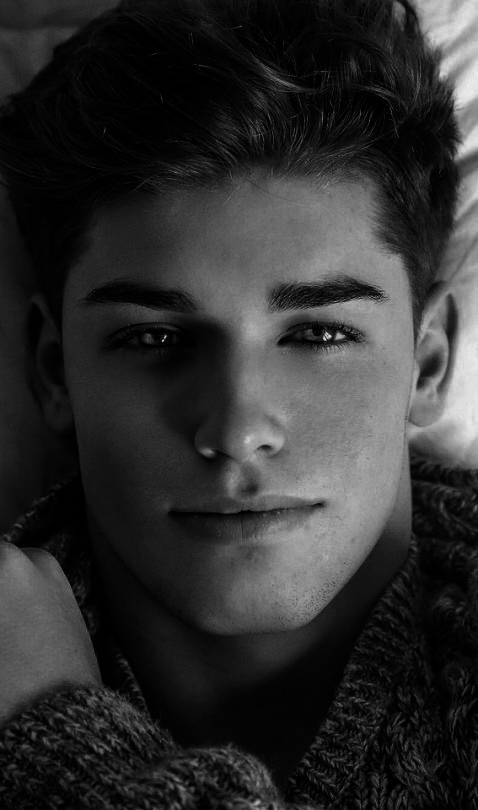

In [111]:
im4=255.0*(gray_image/255.0)**2#Darken all image pixels
cv2_imshow(im4)

We will now display the image when we have increased the contrast, which means - we will darken all the dark pixels and lighten all the light pixels

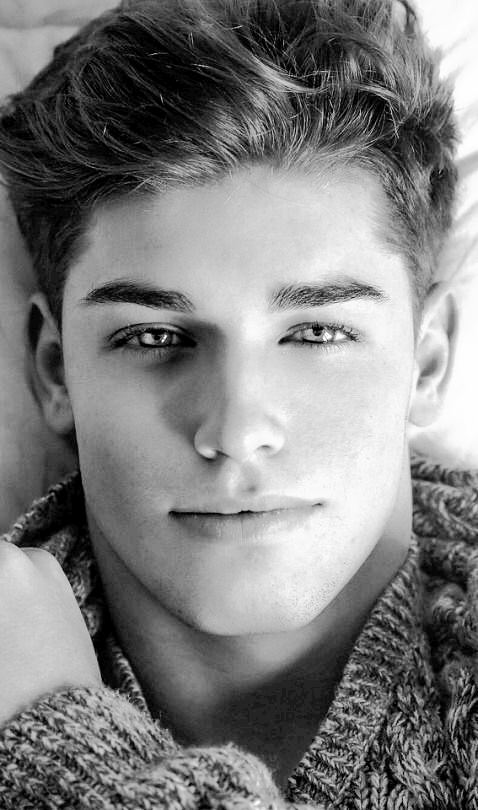

In [112]:
def histeq(im, nbr_bins=256):#Function to increase the contrast in the image
  """Histogram equalization of a grayscale image. """
  imhist, bins=np.histogram(im.flatten(), nbr_bins, [0,256])
  cdf=imhist.cumsum()
  cdf=imhist.max()*cdf/cdf.max()
  cdf_mask=np.ma.masked_equal(cdf, 0)
  cdf_mask=(cdf_mask-cdf_mask.min())*255/(cdf_mask.max()-cdf_mask.min())
  cdf=np.ma.filled(cdf_mask,0).astype('uint8')
  return cdf[im.astype('uint8')]

im5=histeq(im4)
cv2_imshow(im5)

We will see the change before and after making an equalization on the image

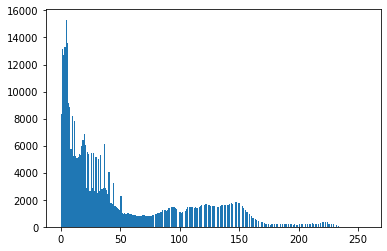

In [113]:
plt.hist(im4.ravel(),bins=256, range=[0,256])#Histogram before equalization
plt.show()

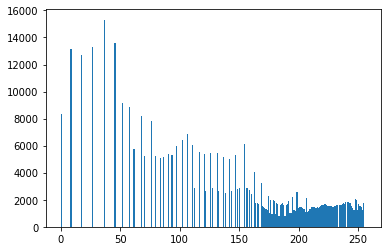

In [114]:
import matplotlib.pyplot as plt
plt.hist(im5.ravel(),bins=256, range=[0,256])#Histogram after equalization
plt.show()

We will present the image and its frequency range

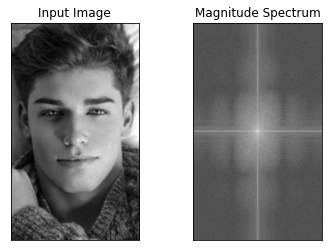

In [115]:
imBlur=cv.blur(gray_image,(5,5))#A fourier transform to find the frequency domain of an image 
f=np.fft.fft2(imBlur)
fshift=np.fft.fftshift(f)
magnitude_spectrum=30*np.log(np.abs(fshift))

plt.subplot(121),plt.imshow(imBlur, cmap='gray')
plt.title('Input Image'),plt.xticks([]),plt.yticks([])
plt.subplot(122),plt.imshow(magnitude_spectrum,cmap='gray')
plt.title('Magnitude Spectrum'),plt.xticks([]),plt.yticks([])
plt.show()

A baby is a new life across the universe, a smooth page, not just a baby's smooth and silky face because he still does not experience enough cases and events that will affect his personality, everything a person experiences in his life remains a sign of it on his mind, every person is made of body and mind. Connected in an integral connection between them, everything that happens to the mind directly affects the body, and of course everything a person experiences mentally also affects his body, as a person grows older, his face and body change, wrinkle, weaken and age from most life events.
You can usually see on a person's face the number of his years in this world.
Another thing is that all of humanity is made up of male and female and we can examine the gender of the person according to his dress, voice, appearance and of course most of the time also according to his face that reflects the whole.
 Let us present to you a system that identifies a person's age and gender according to available characters. How infinite wisdom exists in this world ....

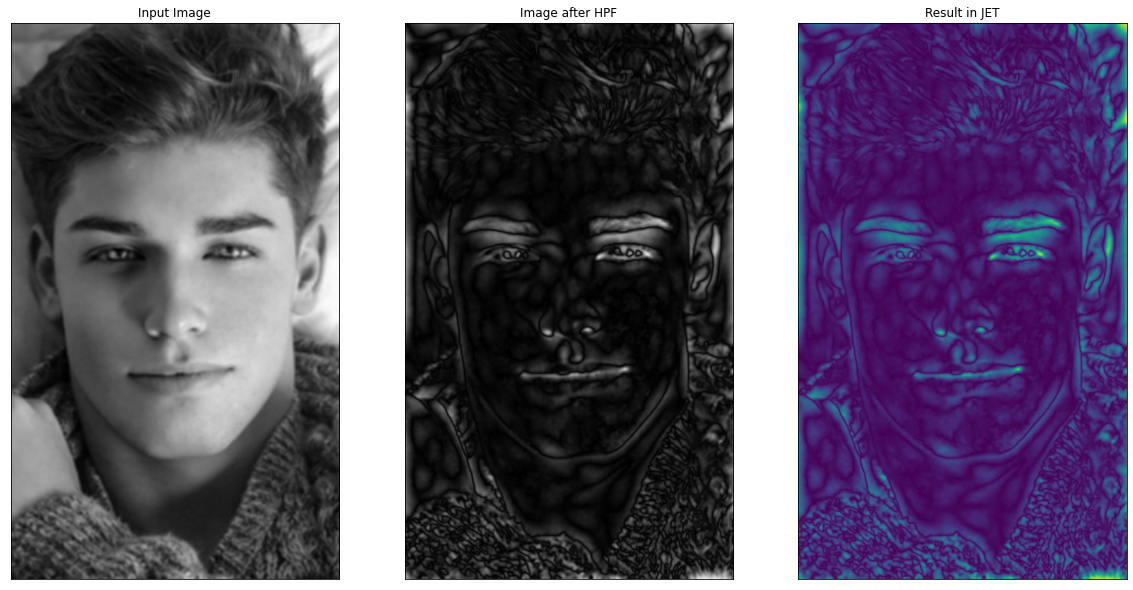

In [116]:
rows , cols=imBlur.shape#Finding ages by Highpass Filtering in FFT
crow,ccol=round(rows/2), round(cols/2)
fshift[crow-10:crow+10,ccol-10:ccol+10]=0
f_ishift=np.fft.ifftshift(fshift)
img_back=np.fft.ifft2(f_ishift)
img_back=np.abs(img_back)

plt.figure(figsize=([20,20]))
plt.subplot(131),plt.imshow(imBlur, cmap='gray')
plt.title('Input Image'),plt.xticks([]),plt.yticks([])
plt.subplot(132),plt.imshow(img_back,cmap='gray')
plt.title('Image after HPF'),plt.xticks([]),plt.yticks([])
plt.subplot(133),plt.imshow(img_back)
plt.title('Result in JET'),plt.xticks([]),plt.yticks([])
plt.show()

Face recignition, Gender And Age Detection

In [117]:
!git clone https://github.com/misbah4064/age_and_gender_detection.git
%cd age_and_gender_detection

Cloning into 'age_and_gender_detection'...
remote: Enumerating objects: 11, done.
remote: Counting objects: 100% (11/11), done.
remote: Compressing objects: 100% (10/10), done.
remote: Total 11 (delta 1), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (11/11), done.
/content/age_and_gender_detection/age_and_gender_detection/age_and_gender_detection


In [118]:
# Downloading pretrained data and unzipping it
!gdown https://drive.google.com/uc?id=1_aDScOvBeBLCn_iv0oxSO8X1ySQpSbIS
# https://drive.google.com/uc?id=1_aDScOvBeBLCn_iv0oxSO8X1ySQpSbIS
!unzip modelNweight.zip

Downloading...
From: https://drive.google.com/uc?id=1_aDScOvBeBLCn_iv0oxSO8X1ySQpSbIS
To: /content/age_and_gender_detection/age_and_gender_detection/age_and_gender_detection/modelNweight.zip
100% 86.2M/86.2M [00:00<00:00, 120MB/s]
Archive:  modelNweight.zip
   creating: modelNweight/
  inflating: modelNweight/age_deploy.prototxt  
  inflating: modelNweight/age_net.caffemodel  
  inflating: modelNweight/gender_deploy.prototxt  
  inflating: modelNweight/gender_net.caffemodel  
  inflating: modelNweight/opencv_face_detector.pbtxt  
  inflating: modelNweight/opencv_face_detector_uint8.pb  


In [119]:
# Import required modules
import cv2 as cv
import math
import time
from google.colab.patches import cv2_imshow
def getFaceBox(net, frame, conf_threshold=0.7):
    frameOpencvDnn = frame.copy()
    frameHeight = frameOpencvDnn.shape[0]
    frameWidth = frameOpencvDnn.shape[1]
    blob = cv.dnn.blobFromImage(frameOpencvDnn, 1.0, (300, 300), [104, 117, 123], True, False)
    net.setInput(blob)
    detections = net.forward()
    bboxes = []
    for i in range(detections.shape[2]):
        confidence = detections[0, 0, i, 2]
        if confidence > conf_threshold:
            x1 = int(detections[0, 0, i, 3] * frameWidth)
            y1 = int(detections[0, 0, i, 4] * frameHeight)
            x2 = int(detections[0, 0, i, 5] * frameWidth)
            y2 = int(detections[0, 0, i, 6] * frameHeight)     
            bboxes.append([x1, y1, x2, y2])
            cv.rectangle(frameOpencvDnn, (x1, y1), (x2, y2), (0, 255, 0), int(round(frameHeight/150)), 8)
    return frameOpencvDnn, bboxes,y1, y2,x1,x2

faceProto = "modelNweight/opencv_face_detector.pbtxt"
faceModel = "modelNweight/opencv_face_detector_uint8.pb"

ageProto = "modelNweight/age_deploy.prototxt"
ageModel = "modelNweight/age_net.caffemodel"

genderProto = "modelNweight/gender_deploy.prototxt"
genderModel = "modelNweight/gender_net.caffemodel"

MODEL_MEAN_VALUES = (78.4263377603, 87.7689143744, 114.895847746)
ageList = ['(0-2)', '(4-6)', '(8-12)', '(15-20)', '(25-32)', '(38-43)', '(48-53)', '(60-100)']
genderList = ['Male', 'Female']

# Load network
ageNet = cv.dnn.readNet(ageModel, ageProto)
genderNet = cv.dnn.readNet(genderModel, genderProto)
faceNet = cv.dnn.readNet(faceModel, faceProto)

padding = 20

def age_gender_detector(frame):
    # Read frame
    t = time.time()
    frameFace, bboxes,yy1,yy2,xx1,xx2 = getFaceBox(faceNet, frame)
    for bbox in bboxes:
        #print(bbox)
        face = frame[max(0,bbox[1]-padding):min(bbox[3]+padding,frame.shape[0]-1),max(0,bbox[0]-padding):min(bbox[2]+padding, frame.shape[1]-1)]
        blob = cv.dnn.blobFromImage(face, 1.0, (227, 227), MODEL_MEAN_VALUES, swapRB=False)
        genderNet.setInput(blob)
        genderPreds = genderNet.forward()
        gender = genderList[genderPreds[0].argmax()]
        ageNet.setInput(blob)
        agePreds = ageNet.forward()
        age = ageList[agePreds[0].argmax()]
        label = "{},{}".format(gender, age)
        cv.putText(frameFace, label, (bbox[0], bbox[1]-10), cv.FONT_HERSHEY_SIMPLEX, 0.8, (0, 255, 255), 2, cv.LINE_AA)
    return frameFace, yy1,yy2,xx1,xx2,gender,age



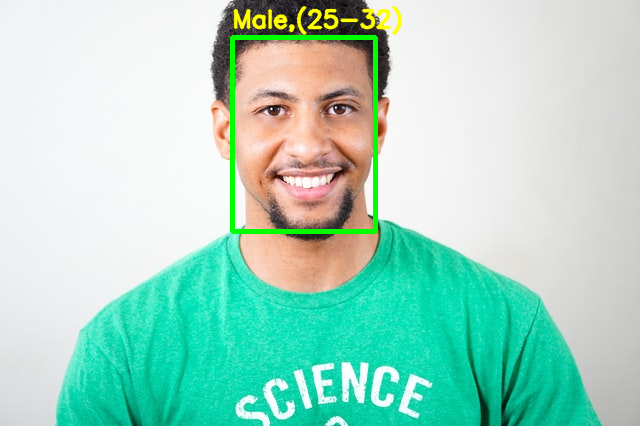

In [120]:
File_object = open('/content/drive/MyDrive/Personal_Character_Analysis_Results.txt.txt', 'a')

from PIL import Image
url="/content/drive/MyDrive/pixx/green.jpg"
input = cv.imread(url)

output,y1,y2,x1,x2,gender,age = age_gender_detector(input)
im = Image.open(url)
width, height = im.size
cv2_imshow(output)

str1="Your gender is: "+gender +"\n"
File_object.write(str1)
str1="You are "+age+ "years old\n"
File_object.write(str1)
# Close the file
File_object.close() 



Each image consists of many different components contained within it, some important and constitute an important and integral part of the image and some less prominent in their presence, we will present you with an example of an image and emphasize the prominent and significant parts that exist in it

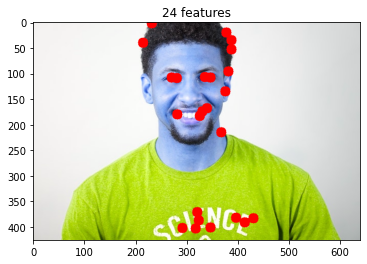

In [121]:
#find features
img = cv.imread(url)
#cv2_imshow(img)
gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
n_features=24

h, w, c = img.shape
#print('width:  ', w)
#print('height: ', h)

#The dimensions of the face frame in the picture
width=x2-x1
height=y2-y1
# Shi-Tomasi corner detection
corners = cv.goodFeaturesToTrack(gray, n_features, 0.01, 10)
corners = np.int0(corners)  # 12 corner coordinates

for i in corners:
    # Compressed to one dimension: [[62,64]]->[62,64]
    x, y = i.ravel()
    cv.circle(img, (x, y),10, 255, -1)

plt.imshow(img)
plt.title('{} features'. format(n_features))
plt.show()

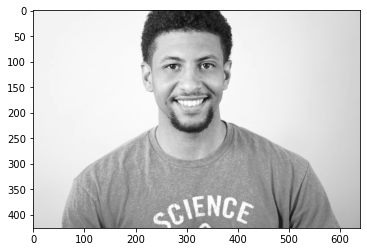

In [122]:
import cv2
img=cv2.imread('/content/age_and_gender_detection/image1.jpg')
gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
plt.imshow(gray, cmap='gray')
plt.savefig('Vision 2.png',dpi=350)

Many times we will use algorithms that use numeric libraries (such as numpy.) To do this we will need to convert
The above numbers are represented by a 32-bit float. Let's do it this way:

In [123]:
gray=np.float32(gray)

In [124]:
img=cv2.imread('/content/age_and_gender_detection/image1.jpg')
gray=np.float32(cv2.cvtColor(img,cv2.COLOR_BGR2GRAY))
dst=cv2.cornerHarris(gray,10,1,0.1)

There are many variations and many features that can be contained in an image Round, triangular or square objects, we will represent a variation of an image where we will leave only the places where there is a high probability of having a corner

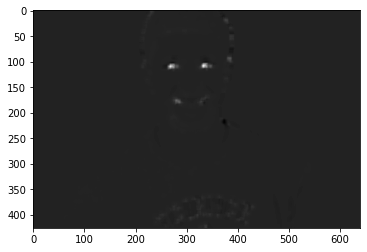

In [125]:
plt.imshow(dst, cmap='gray')

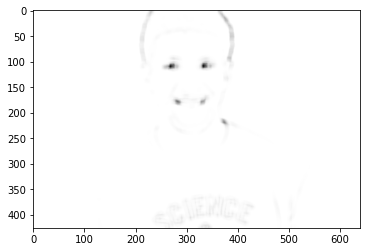

In [126]:
img=cv2.imread('/content/age_and_gender_detection/image1.jpg')
gray=np.float32(cv2.cvtColor(img,cv2.COLOR_BGR2GRAY))
dst=cv2.cornerHarris(gray,10,1,100000)
img[dst>0.001*dst.max()]=[255,0,0]
plt.imshow(dst, cmap='gray')

In [127]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets, cluster
from sklearn.feature_extraction.image import grid_to_graph

In [128]:
faces = datasets.fetch_olivetti_faces(shuffle=True)

In [129]:
images = faces.images
X = np.reshape(images, (len(images), -1))
connectivity = grid_to_graph(*images[0].shape)
agglo = cluster.FeatureAgglomeration(connectivity=connectivity, n_clusters=32)
agglo.fit(X)

FeatureAgglomeration(affinity='euclidean', compute_full_tree='auto',
                     connectivity=<4096x4096 sparse matrix of type '<class 'numpy.int64'>'
	with 20224 stored elements in COOrdinate format>,
                     distance_threshold=None, linkage='ward', memory=None,
                     n_clusters=32,
                     pooling_func=<function mean at 0x7fd42f6db0e0>)

In [130]:
X_reduced = agglo.transform(X)
X_restored = agglo.inverse_transform(X_reduced)
images_restored = np.reshape(X_restored, images.shape)

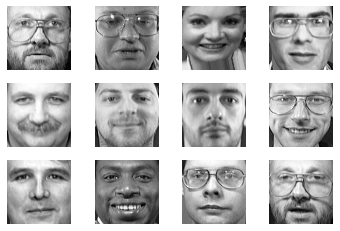

In [131]:
for i in range(12):
 plt.subplot(3, 4, i+1)
 plt.imshow(images[i], cmap=plt.cm.gray, interpolation='nearest')
 plt.axis('off')
plt.show()

We will define an agglomeration features mechanism for images with 32 classes, and we will trust it to an image array. We will then restore the images from the set of features. The result will look like this:

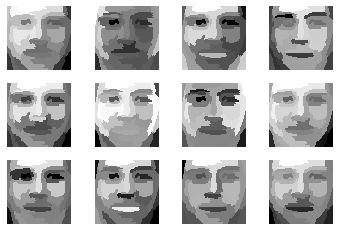

In [132]:
for i in range(12):
 plt.subplot(3, 4, i+1)
 plt.imshow(images_restored[i], cmap=plt.cm.gray, interpolation='nearest')
 plt.axis('off')
plt.show()

We will now print the labels of the classifier and the result will look like this:

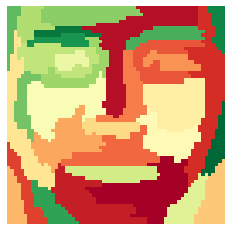

In [133]:
plt.imshow(np.reshape(agglo.labels_, images[0].shape),
 interpolation='nearest', cmap=plt.cm.RdYlGn)
plt.axis('off')
plt.show()

forehead:

In [134]:
!pip install opencv-python
!pip install imutils
!pip install dlib

In [135]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
print(os.listdir("/content/drive/MyDrive/pixx"))

['black.png', 'blue.png', 'meat.jpg', 'nacked.jpg', 'green.jpg', '.ipynb_checkpoints']


An implimentation of Facial landmark Detection using the trained data from iBUG's 68 landmark model
Code Curtesy of Adrian Rosebrock's pyimage blog This model identifies 68 landmarks around the face; 17 defining the shape of the jaw, 10 for the brows (5 each), 4 along the bridge of the nose, 5 along the tip and base of the nose, 12 for eye shape (6 each), 12 for the outer lip outline, 8 for the inside lip outline

In [136]:
import cv2,matplotlib.pyplot as plt,dlib,imutils
from imutils import face_utils

detector = dlib.get_frontal_face_detector()
predictor = dlib.shape_predictor("/content/drive/MyDrive/shape_predictor_68_face_landmarks.dat")

The main contours of a person, by which we can decipher his character traits are: forehead, eyebrows, eyes, nose and lips, we run an algorithm that identifies them and counts the main points of each of them in numbers according to the diagram below:

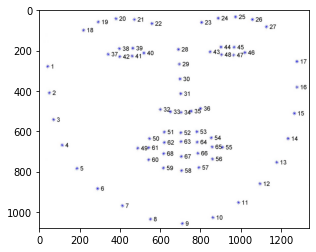

In [137]:
img=cv2.imread('/content/facial_landmarks_68markup.jpg')
plt.imshow(img)

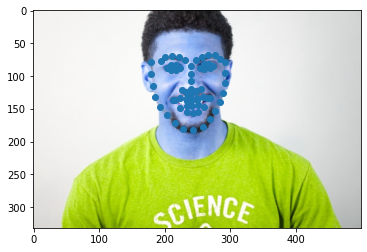

In [138]:
import cv2
image=cv2.imread('/content/drive/MyDrive/pixx/green.jpg')
image = imutils.resize(image, width=500)
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
rects = detector(gray, 1)

for rect in rects:
  pred=predictor(gray,rect)
  fig, ax1 = plt.subplots()
  ax1.imshow(image)
  ax1.scatter(face_utils.shape_to_np(pred)[:,0],face_utils.shape_to_np(pred)[:,1])
    
# del predictor
def rect_to_bb(rect):
  # take a bounding predicted by dlib and convert it
  # to the format (x, y, w, h) as we would normally do
  # with OpenCV
  x = rect.left()
  y = rect.top()
  w = rect.right() - x
  h = rect.bottom() - y
  # return a tuple of (x, y, w, h)
  return (x, y, w, h)
#print(rect_to_bb(rect))
def shape_to_np(shape, dtype="int"):
  # initialize the list of (x, y)-coordinates
  coords = np.zeros((68, 2), dtype=dtype)
  # loop over the 68 facial landmarks and convert them
  # to a 2-tuple of (x, y)-coordinates
  for i in range(0, 68):
    coords[i] = (shape.part(i).x, shape.part(i).y)
    # return the list of (x, y)-coordinates
  return coords
points=shape_to_np(pred) 

Facial theory, how fascinating it is, and here is a classification of the features according to the location of the facial organs,

In [139]:
File_object = open('/content/drive/MyDrive/Personal_Character_Analysis_Results.txt.txt', 'a')
#Eyes distance 
leftE=points[39][0]#The right end of the left eye
rightE=points[42][0]#The left end of the right eye
Length=len(image[0])
width=len(image)
distE=(rightE-leftE)/width
if distE<0.1:#Close eyes
  File_object.write("You are an independent person, who always prefers his own company over that of others. You are vulnerable, critical, a little pessimistic, and very impatient (maybe just to yourself). You always seem calm and calm, but in between he erupts in rage (on others of course).\n")
else:#Far eyes
  File_object.write("You are an optimistic man and very artistic. You have extraordinary endurance and your favorite thing in the world is to be free and free from restrictive frameworks. Sociability is another trait that goes with you excellently, when it is not restrained -live and let live-.Traits: kindness, giving, love, kindness.\n")
#Eyes size
#print(o)
left_eye_height=(points[41][1]-points[37][1])/height#Left eye height
#right_eye_height=(points[46][1]-points[44][1])/height#Right eye height
left_eye_length=(points[39][0]-points[36][0])/width#Left eye length
#right_eye_length(points[45][0]-points[42][0])/width#Right eye length
if left_eye_length>0.065:#Slanted eyes
  File_object.write("You have great self-confidence and self-esteem in heaven. You are arrogant and aggressive towards others. And optimistic.\n")
else:
  if left_eye_height<0.05:
    File_object.write("You are a cunning and rather insidious type. There is always a goal in front of your eyes and you will try to reach it, when all means, for you, are kosher. At the same time, you tend to internalize and repress pain and vulnerability.\n")
  else:
    File_object.write("You attract attention and a sociable and hedonistic type. You will always chase after money and publicity. Most of the time, you see in your eyes that you are very happy with yourself\n")
#Nose
nose =((points[35][0]-points[31][0])/width)
if nose>=0.08:#big nose
  File_object.write("You are an ambitious, idealistic man - who lives for values, has sharp instincts when it comes to yourself and the environment. Has emotional warmth.\n")
if nose>=0.09:#A huge nose
  File_object.write("You are usually a person who works for the environment more than for yourself. You know what is good for you, but you intend to do good to others.Has emotional warmth.Has the ability to survive\n")
if nose<0.08:#Medium nose
  File_object.write("You are a very pessimistic person, but at the same time also an honest person,\n")
if nose<=0.07:#Small nose
  File_object.write("You are a very real and loyal person. On the outside you show a definitely positive performance, but on the inside you are sad and tend to sink into deep depressions.\n")
#Lips
upper_lip=(points[62][1]-points[51][1])/height# upper lip
bottom_lip=(points[57][1]-points[66][1])/height#Bottom lip
if upper_lip>=0.08:#Wide lips
  File_object.write("You smile non-stop, you are a sociable, optimistic type and know how to sting on the weak points. Interest is the aspiration of your life. And you do not shut up, especially when necessary, and you have no particular tact.Attributes: Chatter, sensuality, innocence, openness, generosity, extravagance, you do not like loneliness.\n")
  if bottom_lip>=0.12:#Thick lower lip
    File_object.write("You are a person with a well-developed gondola center, strong sexuality, sensuality, warm emotion, sensual conversation, preferring physical contact.\n") 
  if upper_lip>=0.9:
    File_object.write("You have a well-developed adrenal center, invest more in work and creativity, warm emotion, prefer conversation, on the more romantic level than the physical.\n")
if upper_lip<0.08:#Narrow lip  
  File_object.write("You are a person with very low self-esteem, prone to fatigue and on the other hand also to aggression and nervousness. You are a type that does not get along in pairs. But only alone. And you are offended by everything.\n") 
  if upper_lip<0.07:#Narrow upper lip
    File_object.write("You have stubbornness")
  if bottom_lip<0.07:#Narrow bottom lip
    File_object.write("You have stubbornness, stinginess, silence, emotional coolness, love loneliness and conciseness")
# Close the file
File_object.close()   

In [140]:
def rect_to_bb(rect):
	# take a bounding predicted by dlib and convert it
	# to the format (x, y, w, h) as we would normally do
	# with OpenCV
	x = rect.left()
	y = rect.top()
	w = rect.right() - x
	h = rect.bottom() - y
	# return a tuple of (x, y, w, h)
	return (x, y, w, h)

In [141]:
File_object = open('/content/drive/MyDrive/Personal_Character_Analysis_Results.txt.txt', 'a')

#Forehead
forehead =((points[19][1]-y1)/height)
if forehead<=0.4:
  if forehead<0.5:
    File_object.write("You are innocent and prone to anger.\n")
  if forehead<0.4:  
    File_object.write("You think about how anything might contribute to you and your image or hurt you and your dignity\n")
  if forehead<0.45:  
    File_object.write("You fight for ideals, successful and guided by logic\n")
  if forehead<0.3:
    File_object.write("You are characterized by a lack of spontaneity, but energetic and active, concise, rational, practical, character of a researcher and do not like idleness\n")
if forehead>0.4:
  if forehead>=0.5:
    File_object.write("You are an intellectual and intelligent type with tremendous potential who does not always find expression\n")
  if forehead>=0.6:
    File_object.write("You are self-aware and have a good memory and withstand the pressures well\n")
  if forehead>=0.7:
    File_object.write("You are hardworking and realistic and guided by your emotion, love to enjoy\n")
  if forehead >=0.8:
    File_object.write("You love to eat and hang out and you are an easy type to live with, adaptable\n")
  if forehead>=0.9:
    File_object.write("You are sociable, wasteful, sensitive, gentle, a believing person, romantic and charismatic\n")
# Close the file
File_object.close()  

In [142]:
def shape_to_np(shape, dtype="int"):
	# initialize the list of (x, y)-coordinates
	coords = np.zeros((68, 2), dtype=dtype)
	# loop over the 68 facial landmarks and convert them
	# to a 2-tuple of (x, y)-coordinates
	for i in range(0, 68):
		coords[i] = (shape.part(i).x, shape.part(i).y)
	  # return the list of (x, y)-coordinates
	return coords

In [143]:
points=shape_to_np(pred)


Once we have managed to extract the landmarks inside we can begin to decipher the features of the person appearing in the picture according to the theory of face

In [144]:
a_file = open("/content/drive/MyDrive/Personal_Character_Analysis_Results.txt.txt")
lines = a_file. readlines()
for line in lines:
  print(line)
a_file.close()


Here is your analysis of your personal character:

Your gender is: Male

You are (25-32)years old

You are an independent person, who always prefers his own company over that of others. You are vulnerable, critical, a little pessimistic, and very impatient (maybe just to yourself). You always seem calm and calm, but in between he erupts in rage (on others of course).

You are a cunning and rather insidious type. There is always a goal in front of your eyes and you will try to reach it, when all means, for you, are kosher. At the same time, you tend to internalize and repress pain and vulnerability.

You are an ambitious, idealistic man - who lives for values, has sharp instincts when it comes to yourself and the environment. Has emotional warmth.

You are a person with very low self-esteem, prone to fatigue and on the other hand also to aggression and nervousness. You are a type that does not get along in pairs. But only alone. And you are offended by everything.

You have stubbornness